<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
inputs = df.values
corr_out = [[1],[1],[1],[0]]

In [2]:
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [3]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

In [4]:
# weights
weight = 2 * np.random.random((3,1)) - 1 
weight

array([[-0.70279393],
       [ 0.71077443],
       [-0.91209067]])

In [5]:
# bias
bias = np.zeros(inputs.shape[0])
bias

array([0., 0., 0., 0.])

In [7]:
# weighted_sum 
weighted_sum = np.dot(inputs, weight)
weighted_sum

array([[-0.91209067],
       [-1.6148846 ],
       [-0.20131624],
       [ 0.0079805 ]])

In [8]:
# activated_output
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.28657221],
       [0.16591155],
       [0.44984023],
       [0.50199511]])

In [10]:
# error
error = corr_out - activated_output
error

array([[ 0.71342779],
       [ 0.83408845],
       [ 0.55015977],
       [-0.50199511]])

In [13]:
# gradient
gradient = error *sigmoid_deriv(activated_output)
gradient

array([[ 0.17474466],
       [ 0.20709369],
       [ 0.13081004],
       [-0.11791297]])

In [17]:
for i in range(200):
    
    weighted_sum = np.dot(inputs, weight) + bias.reshape(-1,1)
    
    activated_output = sigmoid(weighted_sum)
    
    error = corr_out - activated_output
    
    gradient = error * sigmoid_deriv(activated_output)
    
    weight += np.dot(inputs.T, gradient)
    
    bias += np.sum(gradient, axis=1)
    
print('\n Weight: \n', weight)
print('\n Activated Output: \n', activated_output)



 Weight: 
 [[-1.52000715]
 [-0.79453938]
 [ 4.88892748]]

 Activated Output: 
 [[0.99846843]
 [0.99702764]
 [0.99713647]
 [0.00376488]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [19]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [41]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
scale = MinMaxScaler()



X = scale.fit_transform(diabetes[feats])


df = pd.DataFrame(X) 

/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [42]:
y = np.array(diabetes.Outcome).reshape(-1,1)

In [43]:
X_test = df.iloc[500:]
X_train = df.iloc[0:500]

In [62]:


class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        
        self.weights = np.zeros(1 + X.shape[1])
        
        self.errors = [] 
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weights[1:] += delta_w * xi
                self.weights[0] += delta_w
                err += int(delta_w != 0.0)
                self.errors.append(err)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

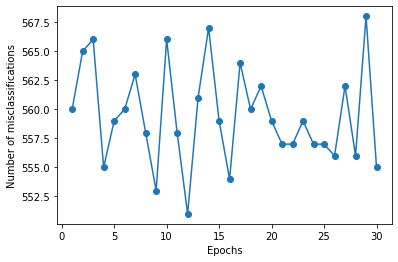

In [63]:
import matplotlib.pyplot as plt

pn = Perceptron(0.5, 30)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?